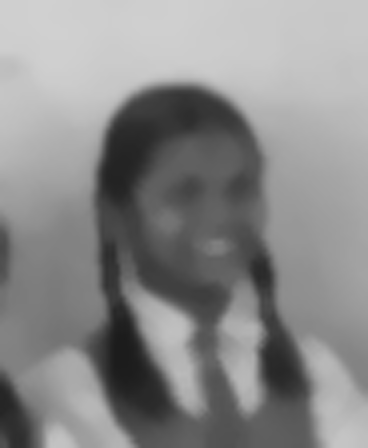

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def denoise(image):
    """Removes noise from an image."""
    # Convert the image to grayscale.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to the image.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply a median filter to the image.
    filtered = cv2.medianBlur(blurred, 5)

    # Return the filtered image.
    return filtered

def upsample(image, factor):
    """Upsamples an image by a given factor."""
    # Upsample the image using bicubic interpolation.
    upsampled = cv2.resize(image, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

    # Return the upsampled image.
    return upsampled

def main():
    # Load the low resolution image.
    image = cv2.imread("/content/2.jpg")

    # Remove noise from the image.
    denoised_image = denoise(image)

    # Upsample the image.
    upsampled_image = upsample(denoised_image, 4)

    # Save the upsampled image as a JPEG file.
    cv2_imshow(upsampled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


**applies noise removal using Gaussian and median filters, and then upsamples the denoised image by a factor of 4 using bicubic interpolation, finally displaying the upsampled image.**

# **enhance_image** function for image enhancement

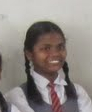

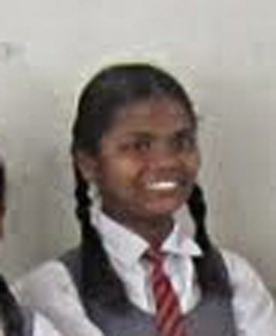

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def enhance_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)

    # Apply adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    adaptive_equalized = clahe.apply(gray)

    # Perform unsharp masking to sharpen the image
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Upsample the image using bicubic interpolation
    upsampled = cv2.resize(sharpened, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

    return upsampled

def main():
    # Load the low-resolution image.
    image = cv2.imread("/content/2.jpg")

    # Enhance the image
    enhanced_image = enhance_image(image)

    # Display the original and enhanced images
    cv2_imshow(image)
    cv2_imshow(enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


**a low-resolution image, enhances it using histogram equalization, adaptive histogram equalization, and unsharp masking for sharpening, and finally upsamples the enhanced image by a factor of 3 using bicubic interpolation, displaying both the original and enhanced images.**